# CHAPTER 6 차원 축소

# 1. PCA(Principal Component Analysis)

- PCA 실습은 와인 데이터셋 (Wine)으로 진행합니다. 아래의 셀을 로드하고 실습을 시작해주세요.

In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
wine = load_wine()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = wine.feature_names
wineDF = pd.DataFrame(wine.data, columns=columns)
wineDF['target'] = wine.target
wineDF.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0


# 1-1. 원본 와인 데이터 세트가 어떻게 분포돼 있는지 두 개의 속성(alcohol,	malic_acid)을 각각 X축, Y축으로 해서 2차원으로 시각화 해주세요.

- ##답안## 을 채워주세요

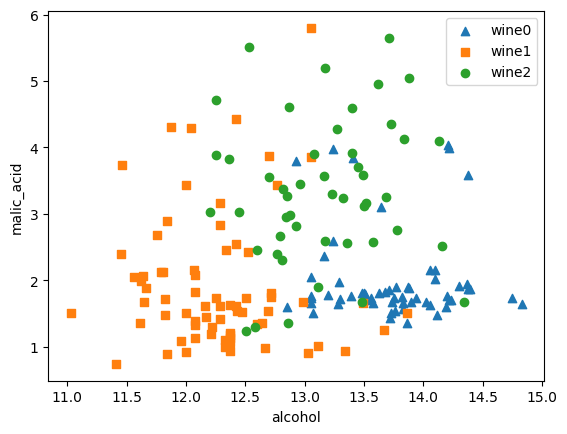

In [2]:
# wine0는 세모, wine1는 네모, wine2는 동그라미로 표현
markers=['^', 's', 'o']

# wine0의 target 값은 0, wine1는 1, wine2는 2. 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
    x_axis_data = wineDF[wineDF['target']==i] ['alcohol']
    y_axis_data = wineDF[wineDF['target']==i] ['malic_acid']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=f'wine{i}')

plt.legend()
plt.xlabel('alcohol')
plt.ylabel('malic_acid')
plt.show()

- PCA 적용 전, 개별 속성 스케일링하는 셀을 실행해주세요

In [3]:
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용해 표준 정규 분포를 가지는 값들로 변환
wine_scaled = StandardScaler().fit_transform(wineDF.iloc[:, :-1])

# 1-2. PCA 적용 -> 4차원 와인 데이터를 2차원 PCA 데이터로 변환

- ##답안##을 채워주세요.

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# fit()과 transform()을 호출해 PCA 변환 데이터 반환
pca.fit(wineDF.drop('target', axis=1))
wine_pca = pca.transform(wineDF.drop('target', axis=1))
print(wine_pca)

[[ 3.18562979e+02  2.14921307e+01]
 [ 3.03097420e+02 -5.36471768e+00]
 [ 4.38061133e+02 -6.53730945e+00]
 [ 7.33240139e+02  1.92729032e-01]
 [-1.15714285e+01  1.84899946e+01]
 [ 7.03231192e+02 -3.32158674e-01]
 [ 5.42971581e+02 -1.35189666e+01]
 [ 5.48401860e+02  1.14494324e+01]
 [ 2.98036863e+02 -8.18015784e+00]
 [ 2.98049553e+02 -7.10154294e+00]
 [ 7.63079712e+02 -8.33431723e+00]
 [ 5.32943228e+02 -1.42876338e+01]
 [ 5.72834410e+02 -2.10050143e+01]
 [ 4.02925358e+02 -1.61026352e+01]
 [ 8.00053394e+02 -1.21184472e+01]
 [ 5.63245578e+02  2.21482866e+00]
 [ 5.33379651e+02  1.08048022e+01]
 [ 3.83317591e+02  8.47741982e+00]
 [ 9.33118387e+02 -8.35447844e+00]
 [ 9.84031775e+01  1.43926594e+01]
 [ 3.35935940e+01  2.55679565e+01]
 [ 2.31464375e+01  1.81747309e+00]
 [ 2.88093030e+02 -3.96304175e+00]
 [ 2.67981513e+02 -9.57070401e+00]
 [ 9.80198858e+01 -5.49584606e+00]
 [ 8.34987440e+01  2.28916215e+01]
 [ 4.47925596e+02 -1.47973313e+01]
 [ 5.37919165e+02 -1.53883461e+01]
 [ 1.68210468e+02  4

변환된 PCA 데이터 세트를 DataFrame으로 변환하여 데이터값 확인하는 코드 셀을 실행해주세요.

In [5]:
# PCA 변환된 데이터의 칼럼명을 각각 pca_component_1, pca_component_2로 명명

pca_columns=['pca_component_1','pca_component_2']
wineDF_pca = pd.DataFrame(wine_pca, columns=pca_columns)
wineDF_pca['target']=wine.target
wineDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,318.562979,21.492131,0
1,303.097420,-5.364718,0
2,438.061133,-6.537309,0


PCA 변환된 데이터 세트 2차원 시각화하는 코드 셀을 실행해주세요.

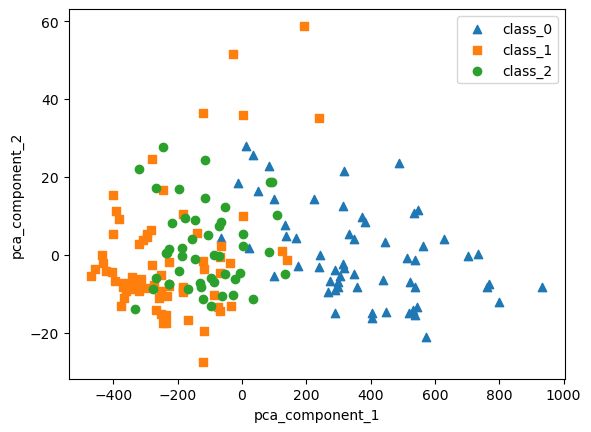

In [6]:
# wine0를 세모, wine1를 네모, wine2를 동그라미로 표시
markers=['^', 's', 'o']

# pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행
for i, marker in enumerate(markers):
    x_axis_data = wineDF_pca[wineDF_pca['target']==i]['pca_component_1']
    y_axis_data = wineDF_pca[wineDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=wine.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

# 1-3. PCA Component별 원본 데이터 변동성 반영률을 확인

- ##답안##을 채워주세요

In [8]:
print(pca.explained_variance_ratio_)

[0.99809123 0.00173592]


# 1-4. 원본 와인 데이터 세트 & PCA로 변환된 데이터 세트에 각각 분류 적용

# (1). 원본 와인 데이터에 Random Forest를 적용하기 위한 ##답안##을 채우세요.

조건 ) Estimator는 RandomForestClassifier를 이용하고
cross_val_score()로 3개의 교차 검증 세트로 정확도 결과를 비교하세요.

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, wineDF.drop('target', axis=1), wineDF['target'], cv=3)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.95       0.89830508 1.        ]
원본 데이터 평균 정확도: 0.9494350282485876


# (2). PCA로 변환된 데이터 세트에 Random Forest를 적용하기 위한 ##답안##을 채우세요.

조건 ) Estimator는 RandomForestClassifier를 이용하고 cross_val_score()로 3개의 교차 검증 세트로 정확도 결과를 비교하세요.

In [10]:
pca_X = wineDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, wineDF['target'], cv=3)
print('PCA 변환 데이터 교차 검증 개별 정확도:',scores_pca)
print( 'PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.65       0.71186441 0.81355932]
PCA 변환 데이터 평균 정확도: 0.7251412429378531


# 2. LDA(Linear Discriminant Analysis)

# 2-1. PDA와 LDA의 주요한 공통점과 차이점을 각각 한 가지씩 설명하세요.

**공통점**

: 모두 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소하는 기법이다.

---
**차이점**

: PCA는 입력 데이터 변동성의 가장 큰 축을 찾는 반면, LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾는다.

# 2-2. 괄호 안의 두 단어 중 해당하는 단어를 각각 적으세요.

# 문제 : 좋은 클래스 분리를 위해서는 클래스 간 분산이 (1) (크고 / 작고), 클래스 내부 분산이 (2) (큰 / 작은) 것을 선택해야 합니다.

# **답안 :**

(1) 크고


(2) 작은

# **[와인 데이터 세트에 LDA 적용하기]**

와인 데이터 세트 로드하고, 표준 정규 분포로 스케일링하는 코드 셀을 실행시켜주세요.

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

wine = load_wine()
wine_scaled = StandardScaler().fit_transform(wine.data)

# 2-3. 2개의 컴포넌트로 와인 데이터를 LDA 변환하는 코드 셀의 ##답안##을 채우세요.

In [14]:
Ida.fit(wineDF.drop('target', axis=1), wineDF['target'])
wine_Ida = Ida.transform(wineDF.drop('target', axis=1))
print(wine_Ida)

[[ 4.70024401  1.97913835]
 [ 4.30195811  1.17041286]
 [ 3.42071952  1.42910139]
 [ 4.20575366  4.00287148]
 [ 1.50998168  0.4512239 ]
 [ 4.51868934  3.21313756]
 [ 4.52737794  3.26912179]
 [ 4.14834781  3.10411765]
 [ 3.86082876  1.95338263]
 [ 3.36662444  1.67864327]
 [ 4.80587907  2.23536271]
 [ 3.42807646  2.17510939]
 [ 3.66610246  2.26248961]
 [ 5.58824635  2.05478773]
 [ 5.50131449  3.61304865]
 [ 3.18475189  2.88952528]
 [ 3.28936988  2.76584266]
 [ 2.99809262  1.42511132]
 [ 5.24640372  3.70982655]
 [ 3.13653106  1.97689922]
 [ 3.57747791  0.5624599 ]
 [ 1.69077135  0.91342136]
 [ 4.83515033  0.9147628 ]
 [ 3.09588961  0.61735888]
 [ 3.32164716  0.29847734]
 [ 2.14482223  0.16369247]
 [ 3.9824285   2.17515679]
 [ 2.68591432  1.21850924]
 [ 3.56309464  1.03817651]
 [ 3.17301573  1.37789624]
 [ 2.99626797  1.32419896]
 [ 3.56866244  2.34065478]
 [ 3.38506383  0.20123426]
 [ 3.5275375   1.71592739]
 [ 2.85190852  1.47070771]
 [ 2.79411996  0.23793093]
 [ 2.75808511  1.56970421]
 

# 2-4. LDA 변환된 입력 데이터 값을 2차원 평면에 품종별로 표현하는 코드 셀의 ##답안##을 채우세요.

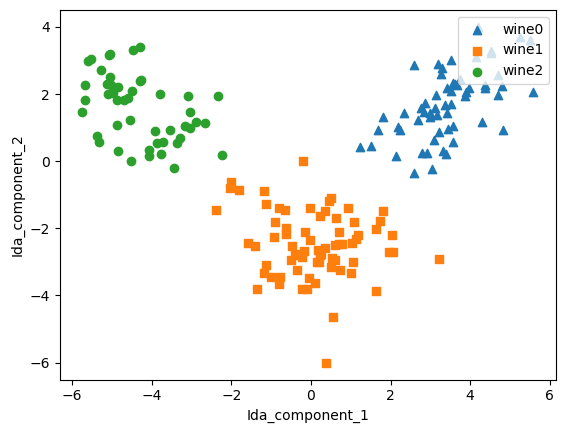

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Ida_columns=['Ida_component_1', 'Ida_component_2']
wineDF_Ida = pd.DataFrame(wine_Ida, columns=Ida_columns)
wineDF_Ida['target']=wine.target

# wine0는 세모, wine1는 네모, wine2는 동그라미로 표현
markers = ['^', 's', 'o']

# wine0의 target 값은 0, wine1는 1, wine2는 2. 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
    x_axis_data = wineDF_Ida [wineDF_Ida ['target']==i] ['Ida_component_1']
    y_axis_data = wineDF_Ida [wineDF_Ida['target']==i] ['Ida_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=f'wine{i}')

plt.legend(loc='upper right')
plt.xlabel('Ida_component_1')
plt.ylabel('Ida_component_2')
plt.show()

# 3. SVD

# 3-1) SVD 연산 및 분해하기

랜덤한 2차원 행렬 A를 생성해 특이값 분해하고, 분해된 행렬을 이용해 원본 행렬로 다시 복원해 봅시다.

(1) 행렬 A 생성

: 넘파이의 rand() 함수를 이용해 3x3 크기의 랜덤한 값을 갖는 행렬 A를 생성해 주세요.

In [16]:
import numpy as np

# 3x3 랜덤 행렬 A 생성
np.random.seed(121)
A = A = np.random.rand(3, 3)
print(np.round(A,3))

[[0.111 0.211 0.233]
 [0.152 0.83  0.408]
 [0.556 0.746 0.248]]


(2) SVD (특이값 분해)

: 넘파이의 SVD 모듈로 A 행렬에 SVD를 적용해 U, Sigma, Vt를 반환받아 그 크기와 값을 출력해 주세요.

(행렬 원소 값은 소수점 아래 3자리까지 반올림해서 출력)

In [18]:
from numpy.linalg import svd

U, Sigma, Vt =svd(A)

# U, Sigma, Vt의 크기 출력
print(U.shape, Sigma.shape, Vt.shape)

# U, Sigma, Vt 행렬 출력
print('U matrix:\n', np.round(U, 3))
print('Sigma Value:\n', np.round(Sigma, 3))
print('V transpose matrix:\n', np.round(Vt, 3))

(3, 3) (3,) (3, 3)
U matrix:
 [[-0.229 -0.148 -0.962]
 [-0.679 -0.684  0.267]
 [-0.697  0.715  0.057]]
Sigma Value:
 [1.342 0.315 0.123]
V transpose matrix:
 [[-0.385 -0.843 -0.375]
 [ 0.878 -0.209 -0.43 ]
 [-0.284  0.495 -0.821]]


(3) U, Sigma, Vt를 이용해 원본 행렬 A 복원하기

: 넘파이(np)의 dot 연산을 이용해 원본 행렬 A를 계산해 주세요.

(💡 Sigma 행렬은 현재 대각원소 값만을 가지는 1차원 벡터이므로, 0을 포함한 대칭행렬로 변환 후 계산해야 합니다 - 넘파이의 diag 함수 사용!)

In [19]:
# Sigma를 다시 0을 포함한 대칭 행렬로 변환
Sigma_mat = np.diag(Sigma)

# 복원 행렬 A_ 계산
A_ = np.dot(U, np.dot(Sigma_mat, Vt))

print(np.round(A_, 3))

[[0.111 0.211 0.233]
 [0.152 0.83  0.408]
 [0.556 0.746 0.248]]


# 3-2) row 간 의존성을 갖는 데이터 세트에 SVD 적용하고 복원하기

이번에는 row 간 의존성이 있는 데이터 세트에 SVD를 적용해 Sigma 값이 어떻게 달라지는지 관찰하고, 0이 아닌 Sigma 값만을 이용해 행렬 A를 복원해 봅시다.

(1) A를 row 간 의존성이 있는 값으로 수정하기

: A의 1번째 로우가 2번째 로우와 3번째 로우 값의 합을 가지도록 값을 수정해 주세요.

In [20]:
A[0] = A[1] + A[2]
print(np.round(A, 3))

[[0.708 1.576 0.656]
 [0.152 0.83  0.408]
 [0.556 0.746 0.248]]


(2) 수정된 A에 SVD를 다시 적용해 U, Sigma, Vt 행렬의 크기와 값을 확인하기

In [21]:
U, Sigma, Vt = svd(A)

# U, Sigma, Vt의 크기 출력
print(U.shape, Sigma.shape, Vt.shape)

# U, Sigma, Vt 행렬 출력
print('U matrix:\n', np.round(U, 3))
print('Sigma Value:\n', np.round(Sigma, 3))
print('V transpose matrix:\n', np.round(Vt, 3))

(3, 3) (3,) (3, 3)
U matrix:
 [[-0.816 -0.007 -0.577]
 [-0.402 -0.71   0.577]
 [-0.414  0.704  0.577]]
Sigma Value:
 [2.263 0.312 0.   ]
V transpose matrix:
 [[-0.384 -0.852 -0.355]
 [ 0.892 -0.243 -0.382]
 [-0.24   0.463 -0.853]]


(3) Sigma의 값이 0인 요소를 제외하고 A 복원하기

: Sigma가 0인 데이터를 제외하고 복원해 봅시다. Sigma에서 0 값을 제외했다면, 이에 대응되는 U, Vt의 값도 제외해 주어야 합니다.

In [24]:
# U 행렬의 경우 Sigma와 내적 수행 -> Sigma 데이터가 0이 아닌 값에 대응되는 열만 추출
U_ = U[:, Sigma != 0]
Sigma_ = Sigma[Sigma != 0]

# Vt 행렬 또한 Sigma와 내적 수행 -> Sigma 데이터가 0이 아닌 값에 대응되는 행만 추출
Vt_ = Vt[Sigma != 0, :]

print(U_.shape, Sigma_.shape, Vt_.shape)

# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
A_ = np.dot(U_, np.dot(np.diag(Sigma_), Vt_))
print(np.round(A_,3))

(3, 3) (3,) (3, 3)
[[0.708 1.576 0.656]
 [0.152 0.83  0.408]
 [0.556 0.746 0.248]]


# 3-3) 사이킷런의 TruncatedSVD 클래스를 이용해 변환하기
사이킷런의 TruncatedSVD 클래스를 이용해 사이킷런의 wine 데이터를 변환하고, PCA 변환 결과와도 비교해 봅시다.

- 모듈 임포트 & 데이터셋 로드

In [25]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

wine = load_wine()
wine_ftrs = wine.data

(1) TruncatedSVD 객체 생성하고 변환 수행하기

: 3개의 주요 component로 TruncatedSVD 객체를 생성하고, fit()과 transform() 함수를 이용해 데이터를 변환해 주세요.

In [26]:
# 3개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=3)
tsvd.fit(wine.data)
wine_tsvd = tsvd.transform(wine.data)

(2) Scatter plot 2차원으로 변환된 데이터 시각화하기

: matplotlib.pyplot 라이브러리로 변환된 데이터를 표현해 주세요. x축은 wine_tsvd의 0번째 열, y축은 wine_tsvd의 1번째 열로 설정하고 데이터는 타겟값으로 설정해 주세요.

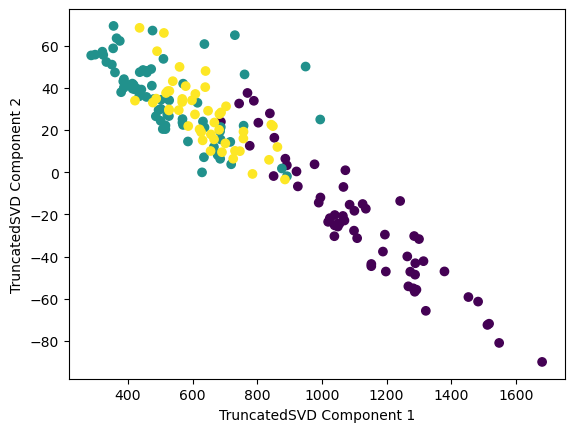

In [27]:
# Scatter plot 2차원으로 TruncatedSVD 변환 된 데이터 표현
plt.scatter(x = wine_tsvd[:, 0], y = wine_tsvd[:, 1], c = wine.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

plt.show()

# 4. LMF

wine 데이터를 사이킷런의 NMF 클래스를 이용해 3개의 컴포넌트로 변환하고 이를 시각화해 봅시다.

- 위 1-3) 문제의 모듈 임포트 & 데이터셋 로드 셀을 실행하고 진행해 주세요!

(1) NMF 객체 생성하고 변환 수행하기

: 3개의 주요 component로 NMF 객체를 생성하고, fit()과 transform() 함수를 이용해 데이터를 변환해 주세요.

In [28]:
from sklearn.decomposition import NMF

# NMF 객체 생성
nmf = NMF(n_components=3, init='random', random_state=42)

# 변환하기
nmf.fit(wine.data)
wine_nmf = nmf.transform(wine.data)

(2) Scatter plot 2차원으로 변환된 데이터 시각화하기

: matplotlib.pyplot 라이브러리로 변환된 데이터를 표현해 주세요. x축은 wine_nmf의 0번째 열, y축은 wine_nmf의 1번째 열로 설정하고 데이터는 타겟값으로 설정해 주세요.

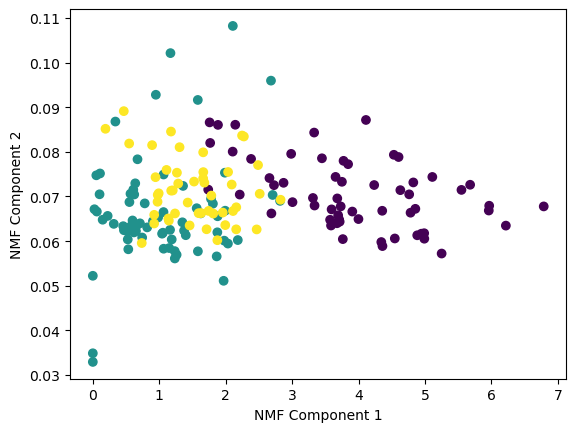

In [29]:
# Scatter plot 2차원으로 NMF 변환 된 데이터 표현
plt.scatter(x = wine_nmf[:, 0], y = wine_nmf[:, 1], c = wine.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

plt.show()

# 5. T-SNE

데이터 세트: https://www.kaggle.com/datasets/zalando-research/fashionmnist?select=fashion-mnist_test.csv

# 5-1. T-SNE를 적용하여 2차원으로 축소하세요.

In [39]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 데이터 불러오기
fashion_df = pd.read_csv(r"C:\Users\lynn\Documents\my_data\fashion-mnist_test.csv\fashion-mnist_test.csv")

# 이미지 픽셀 정보만
X = fashion_df.iloc[:, 1:]
y = fashion_df.iloc[:, 0]

# 표준화
X_norm = StandardScaler().fit_transform(X)

# 차원 축소
tsne = TSNE(random_state=42)
X_tsne = tsne.fit_transform(X_norm)

print('Number of Features in Fashion-MNIST Dataset Before T-SNE : {}\n\nNumber of Features in Fashion-MNIST Dataset After T-SNE : {}'.format(X.shape[1], X_tsne.shape[1]))

Number of Features in Fashion-MNIST Dataset Before T-SNE : 784

Number of Features in Fashion-MNIST Dataset After T-SNE : 2


# 5-2. T-SNE를 적용한 데이터를 이용해 시각화를 진행하세요.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

# 시각화 함수 정의
def plot_labelled_scatter(X, y, class_labels, s):
    num_labels = len(class_labels)

    x_min, x_max = X[:, 0].min() -1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() -1, X[:, 1].max() + 1

    color_array = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1', '#955251', '#B565A7', '#009B77', '#DD4124', '#45B8AC']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(np.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure(figsize=s)

    plt.scatter(X[:, 0], X[:, 1], s=80, c=y, cmap=cmap_bold, norm=bnorm, alpha=0.4, edgecolor='black', lw=1)
    sp = plt.gca().spines
    sp['top'].set_visible(False)
    sp['right'].set_visible(False)

    plt.grid(which='both', color='lightslategrey', alpha=0.3)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h, fontsize=12, frameon=False)

# 시각화 함수 실행
plot_labelled_scatter(
    X_tsne,
    y,
    ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
     'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'],
    (15, 9)
)

plt.xlabel('First T-SNE Dimension', fontsize=14)
plt.ylabel('Second T-SNE Dimension', fontsize=14)
plt.title('Fashion MNIST Dataset T-SNE', fontsize=17)

# 6. UMAP

# 6-1. UMAP을 적용하여 이미지 데이터의 차원을 2차원으로 축소하세요.

In [ ]:
from sklearn.preprocessing import StandardScaler
import umap
import pandas as pd

# 데이터 불러오기
fashion_df = pd.read_csv(r"C:\Users\lynn\Documents\my_data\fashion-mnist_test.csv\fashion-mnist_test.csv")

# 입력값과 레이블 분리
X = fashion_df.iloc[:, 1:]
y = fashion_df.iloc[:, 0]

# 표준화
X_scaled = StandardScaler().fit_transform(X)

# UMAP 객체 생성 및 차원 축소 수행
um = umap.UMAP(random_state=42)
X_umap = um.fit_transform(X_scaled)

print('Number of Features in Fashion MNIST Dataset Before UMAP : {}\n\nNumber of Features in Fashion MNIST Dataset After UMAP: {}'.format(X.shape[1], X_umap.shape[1]))

Number of Features in Fashion MNIST Dataset Before UMAP : 784

Number of Features in Fashion MNIST Dataset After UMAP: 2


# 6-2. UMAP으로 차원 축소한 데이터를 시각화하세요.

In [ ]:
# 다음 코드를 실행하세요
!pip install umap-learn

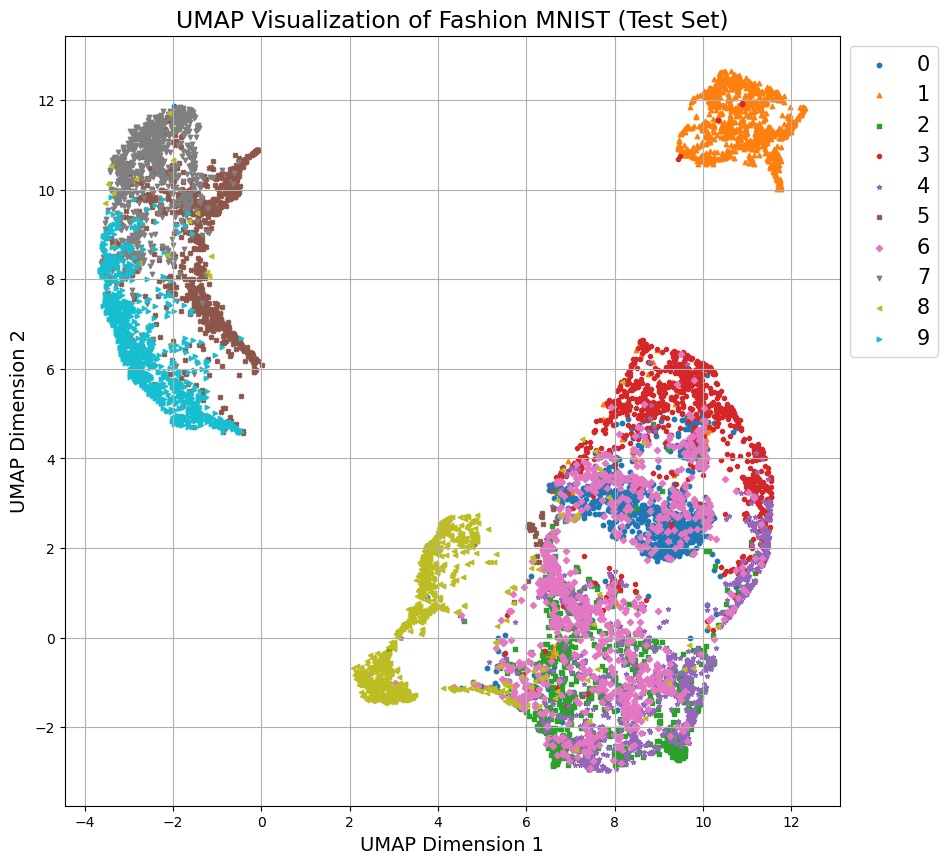

In [ ]:
import matplotlib.pyplot as plt

markers = ['o', '^', 's', 'P', '*', 'X', 'D', 'v', '<', '>']

plt.figure(figsize=(10, 10))
for i, marker in enumerate(markers):
    plt.scatter(*X_umap[y == i].T, label=i, s=10, alpha=1, marker=marker)

plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left', fontsize=15)
plt.xlabel('UMAP Dimension 1', fontsize=14)
plt.ylabel('UMAP Dimension 2', fontsize=14)
plt.title('UMAP Visualization of Fashion MNIST (Test Set)', fontsize=17)
plt.grid(True)
plt.show()